## Урок 3. Домашнее задание

### 3.1 Задание среднего уровня.

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

Получается у нас три фичи (датасет трёхмерный) и задача классификации на три класса.

загружаем датасет в память

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
df_source = pd.read_csv('/Users/mikhail/Data Science Projects/Data Scientist/1. ML. Начальный уровень/08/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


**В рамках домашнего задания**

1. Визуализируйте первый и третий столбец из набора данных `call_diff` и`traffic_diff` в виде scatter
2. Постройте PCA  сожмите их до одномерного случая, визуализируйте результат


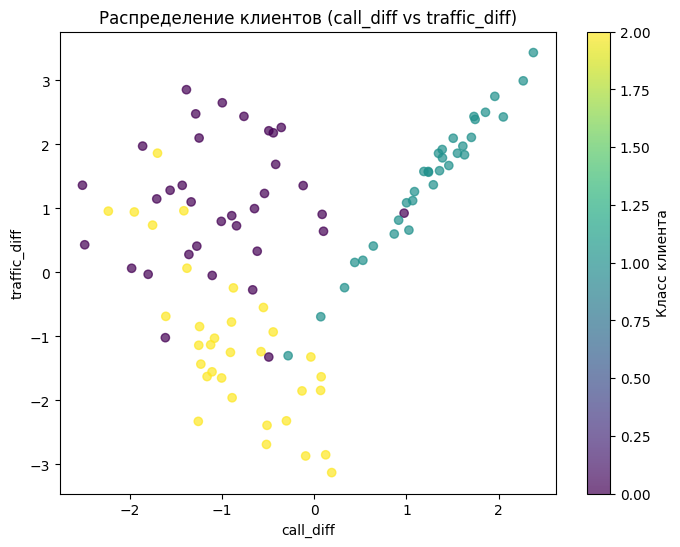

In [8]:
# -- ВАШ КОД ТУТ --
plt.figure(figsize=(8,6))
plt.scatter(df_source['call_diff'],df_source['traffic_diff'],c=y, cmap='viridis', alpha=0.7)
plt.xlabel("call_diff")
plt.ylabel("traffic_diff")
plt.title("Распределение клиентов (call_diff vs traffic_diff)")
plt.colorbar(label="Класс клиента")
plt.show()

In [5]:
df_source['call_diff'].values

array([-0.66642088, -0.88927281, -0.84150307,  1.38974939, -1.22821053,
       -0.11931996,  1.23620879, -0.90744735, -1.16059805, -0.76099026,
       -1.69791487,  0.32890444,  0.97431728,  2.26522832, -1.35754653,
       -1.24197713,  1.23880773,  1.06686075, -1.3786289 ,  1.74407886,
        0.10075893, -1.24690633, -0.5760517 ,  1.61081926,  2.04945536,
        1.45856895, -0.51711372, -0.55004793, -1.41216815, -1.25571202,
       -0.87535879,  1.35793586,  0.43954042, -0.89345757, -1.75098276,
        2.3749884 ,  1.00096875,  0.86759821,  1.02641199, -1.07998995,
        0.07575867,  0.91494533, -1.28368825, -1.56122092, -0.09244747,
       -1.27171463, -0.61720272, -1.42972258, -0.30067599,  1.38748688,
       -0.41726347, -1.33332748, -1.7060371 , -0.44266088, -0.99557526,
       -1.60774873, -1.10488856,  0.12457901, -0.64708913, -0.49158848,
        1.34715743, -1.85901141, -2.23061435, -2.48673598,  1.29108076,
        0.06957864,  1.08685707, -1.10705325, -1.00670526, -1.00

In [10]:
X.shape

(100, 3)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
print("Форма после PCA:", X_pca.shape)


Форма после PCA: (100, 1)


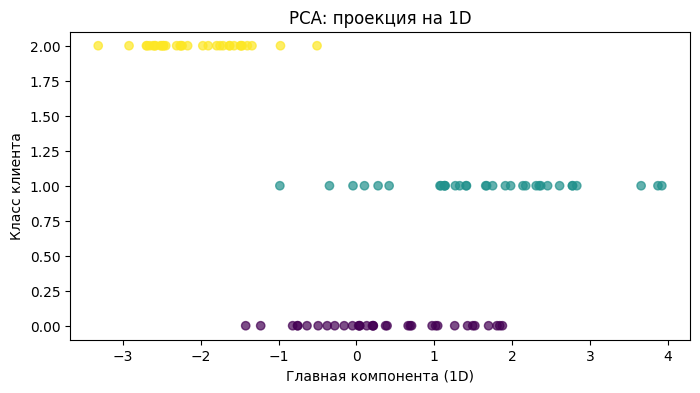

In [13]:
plt.figure(figsize=(8,4))
plt.scatter(X_pca, y, c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Главная компонента (1D)")
plt.ylabel("Класс клиента")
plt.title("PCA: проекция на 1D")
plt.show()


### 3.2 Задание высокого уровня

Сжимать двумерные данные не очень интересно, давайте попробуем применить PCA к трёхмерному датасету и сжать данные до размерности $n=2$.

Для наглядности и визуализируем наши трёхмерные данные в 3D:

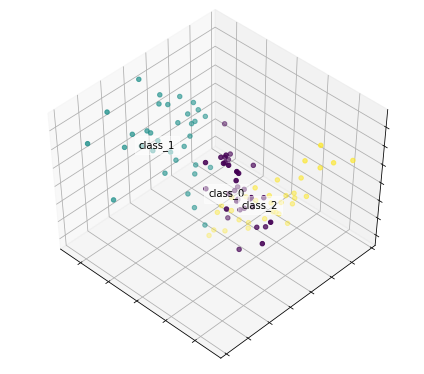

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:
![classification_dim_reduction](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/classification_dim_reduction.png)

In [14]:
# -- ВАШ КОД ТУТ --
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Форма новых данных:", X_pca.shape)


Форма новых данных: (100, 2)


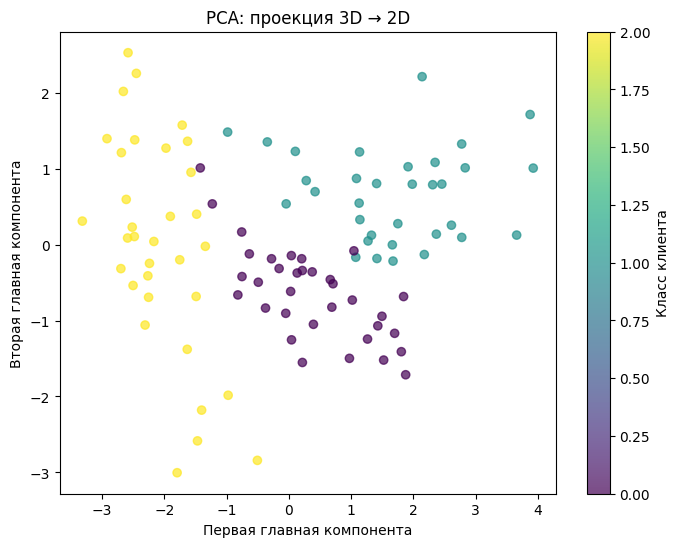

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title("PCA: проекция 3D → 2D")
plt.colorbar(label="Класс клиента")
plt.show()


В этом уроке мы научились применять алгоритм PCA  понизили размерность датасета с $n=2$ до $n=1$.

В следующем уроке мы реализуем алгоритм PCA на языке python по шагам.